# Usage Demo : 


In [ ]:
!apt-get install swig

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  swig4.0
Suggested packages:
  swig-doc swig-examples swig4.0-examples swig4.0-doc
The following NEW packages will be installed:
  swig swig4.0
0 upgraded, 2 newly installed, 0 to remove and 24 not upgraded.
Need to get 1,086 kB of archives.
After this operation, 5,413 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 swig4.0 amd64 4.0.1-5build1 [1,081 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 swig all 4.0.1-5build1 [5,528 B]
Fetched 1,086 kB in 2s (435 kB/s)
Selecting previously unselected package swig4.0.
(Reading database ... 122518 files and directories currently installed.)
Preparing to unpack .../swig4.0_4.0.1-5build1_amd64.deb ...
Unpacking swig4.0 (4.0.1-5build1) ...
Selecting previously unselected package swig.
Preparing to unpack .../swig_4.0.1-5build1_all

In [ ]:
!python setup.py install

python3: can't open file '/content/setup.py': [Errno 2] No such file or directory


In [ ]:
!pip install git+https://github.com/vishnubob/python-midi@feature/python3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/vishnubob/python-midi (to revision feature/python3) to /tmp/pip-req-build-y4q104ay
  Running command git clone --filter=blob:none --quiet https://github.com/vishnubob/python-midi /tmp/pip-req-build-y4q104ay
  Running command git checkout -b feature/python3 --track origin/feature/python3
  Switched to a new branch 'feature/python3'
  Branch 'feature/python3' set up to track remote branch 'feature/python3' from 'origin'.
  Resolved https://github.com/vishnubob/python-midi to commit abb85028c97b433f74621be899a0b399cd100aaa
  Preparing metadata (setup.py) ... done
  Created wheel for midi: filename=midi-0.2.3-cp310-cp310-linux_x86_64.whl size=348503 sha256=3c6fcaf29130f418aade5daa9daaacb9b42740ece6773ddbbad6c7fc63474ba0
  Stored in directory: /tmp/pip-ephem-wheel-cache-4urlj1un/wheels/07/67/b5/a8eeff61b2f6e3f7fda1010525639b13e384cea72c64e2af73
Successfully built m

In [ ]:
pip install pretty_midi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 27.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 5.2 MB/s eta 0:00:00
  Created wheel for pretty_midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592289 sha256=6fe0e543d3e5cc5917551c0772db4a5da212e2dc9d827d74886c2b5f77ef9a3f
  Stored in directory: /root/.cache/pip/wheels/cd/a5/30/7b8b7f58709f5150f67f98fde4b891ebf0be9ef07a8af49f25
Successfully built pretty_midi


In [ ]:
from google.colab import files
import os
import zipfile

Upload `mgeval` module

In [ ]:
# Upload a single file: zip file here
uploaded = files.upload()
filename = next(iter(uploaded.keys()))
#print(f"Uploaded file: {filename}")
filename_without_ext = os.path.splitext(filename)[0]  # remove the extension
#print(filename_without_ext) 
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall(os.path.join('.'))
# remove zip file
if os.path.exists(filename):
    os.remove(filename)
else:
    print(filename + "does not exist")

Saving mgeval_src.zip to mgeval_src.zip


In [ ]:
import midi
import glob
import numpy as np
import pretty_midi
import seaborn as sns
import matplotlib.pyplot as plt
from mgeval_src import core, utils
from sklearn.model_selection import LeaveOneOut

## Absolute measurement: statistic analysis


Upload datasets

In [ ]:
# save datasets in this path 
path = os.path.join('.', 'data')

In [ ]:
# Upload a single file: zip file here
uploaded = files.upload()
filename = next(iter(uploaded.keys()))
#print(f"Uploaded file: {filename}")
filename_without_ext = os.path.splitext(filename)[0]  # remove the extension
#print(filename_without_ext) 
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall(path)
# remove zip file
if os.path.exists(filename):
    os.remove(filename)
else:
    print(filename + "does not exist")

# Assign dataset path
dir_path = os.path.dirname(path)
set1_data = glob.glob(os.path.join(path, filename_without_ext, '*.mid'))

Saving gen8bar.zip to gen8bar.zip


In [ ]:
# Upload a single file: zip file here
uploaded = files.upload()
filename = next(iter(uploaded.keys()))
#print(f"Uploaded file: {filename}")
filename_without_ext = os.path.splitext(filename)[0]  # remove the extension
#print(filename_without_ext) 
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall(path)
# remove zip file
if os.path.exists(filename):
    os.remove(filename)
else:
    print(filename + "does not exist")

# Assign dataset path
dir_path = os.path.dirname(path)
set2_data = glob.glob(os.path.join(path, filename_without_ext, '*.mid'))

Saving ChMusicMIDI.zip to ChMusicMIDI.zip


construct empty dictionary to fill in measurement across samples

In [ ]:

num_samples = min(len(set1_data), len(set2_data))
num_bar = 8
set1 = set1_data[0:num_samples]
set2 = set2_data[0:num_samples]
print(f"num_samples = {num_samples}")

num_samples = 55


In [ ]:
set1_eval = {'total_used_note':np.zeros((num_samples,1)), 
             'bar_used_note':np.zeros((num_samples,num_bar,1)), 
             'note_length_hist':np.zeros((num_samples,12)), 
             'note_length_transition_matrix':np.zeros((num_samples, 12, 12)),
             'total_used_pitch':np.zeros((num_samples,1)),
             'bar_used_pitch':np.zeros((num_samples,num_bar,1)),
             'pitch_range':np.zeros((num_samples,1)),
             'total_pitch_class_histogram':np.zeros((num_samples, 12)),
             'pitch_class_transition_matrix':np.zeros((num_samples, 12, 12))}
metrics_list = list(set1_eval.keys())
num_features = len(metrics_list)
for i in range(0, num_features):
  for j in range(0, num_samples):
      feature = core.extract_feature(set1[j])
      if (i == 0):
        set1_eval[metrics_list[i]][j] = getattr(core.metrics(), metrics_list[i])(feature, track_num = 0) #total_used_note
      elif (i == 1 or i == 5):
        set1_eval[metrics_list[i]][j] = getattr(core.metrics(), metrics_list[i])(feature, track_num = 0, num_bar = num_bar) #bar_used_note & bar_used_pitch
      elif (i == 2 or i == 3):
        set1_eval[metrics_list[i]][j] = getattr(core.metrics(), metrics_list[i])(feature, track_num = 0, normalize = True, pause_event = False) #note_length_hist & note_length_transition_matrix
      elif (i == num_features - 1):
        set1_eval[metrics_list[i]][j] = getattr(core.metrics(), metrics_list[i])(feature, normalize = 0) #pitch_class_transition_matrix
      else:
        set1_eval[metrics_list[i]][j] = getattr(core.metrics(), metrics_list[i])(feature) #other features

repeat for second dataset

In [ ]:
# set2 = glob.glob('./data/set2/*.mid')
set2_eval = {'total_used_pitch':np.zeros((num_samples,1)), 
             'bar_used_note':np.zeros((num_samples,num_bar,1)), 
             'note_length_hist':np.zeros((num_samples,12)), 
             'note_length_transition_matrix':np.zeros((num_samples, 12, 12)),
             'total_used_pitch':np.zeros((num_samples,1)),
             'bar_used_pitch':np.zeros((num_samples,num_bar,1)),
             'pitch_range':np.zeros((num_samples,1)),
             'total_pitch_class_histogram':np.zeros((num_samples, 12)),
             'pitch_class_transition_matrix':np.zeros((num_samples, 12, 12))}
for i in range(0, num_features):
  for j in range(0, num_samples):
      eature = core.extract_feature(set2[j])
      if (i == 0):
        set2_eval[metrics_list[i]][j] = getattr(core.metrics(), metrics_list[i])(feature, track_num = 0) #total_used_note
      elif (i == 1 or i == 5):
        set2_eval[metrics_list[i]][j] = getattr(core.metrics(), metrics_list[i])(feature, track_num = 0, num_bar = num_bar) #bar_used_note & bar_used_pitch
      elif (i == 2 or i == 3):
        set2_eval[metrics_list[i]][j] = getattr(core.metrics(), metrics_list[i])(feature, track_num = 0, normalize = True, pause_event = False) #note_length_hist & note_length_transition_matrix
      elif (i == num_features - 1):
        set2_eval[metrics_list[i]][j] = getattr(core.metrics(), metrics_list[i])(feature, normalize = 0) #pitch_class_transition_matrix
      else:
        set2_eval[metrics_list[i]][j] = getattr(core.metrics(), metrics_list[i])(feature) #other features

statistic analysis: absolute measurement

In [ ]:
for i in range(0, len(metrics_list)):
    print (metrics_list[i] + ':')
    print ('------------------------')
    print (' demo_set')
    print ('  mean: ', np.mean(set1_eval[metrics_list[i]], axis=0))
    print ('  std: ', np.std(set1_eval[metrics_list[i]], axis=0))

    print ('------------------------')
    print (' demo_set')
    print ('  mean: ', np.mean(set2_eval[metrics_list[i]], axis=0))
    print ('  std: ', np.std(set2_eval[metrics_list[i]], axis=0))
    print (' ')


total_used_pitch:
------------------------
 demo_set
  mean:  [6.14545455]
  std:  [2.02186396]
------------------------
 demo_set
  mean:  [44.43636364]
  std:  [9.15872884]


## Relative measurement: generalizes the result among features with various dimensions


the features are sum- marized to 
- the intra-set distances
- the difference of intra-set and inter-set distances.

exhaustive cross-validation for intra-set distances measurement

In [ ]:
loo = LeaveOneOut()
loo.get_n_splits(np.arange(num_samples))
set1_intra = np.zeros((num_samples, len(metrics_list), num_samples-1))
set2_intra = np.zeros((num_samples, len(metrics_list), num_samples-1))
for i in range(len(metrics_list)):
    for train_index, test_index in loo.split(np.arange(num_samples)):
        set1_intra[test_index[0]][i] = utils.c_dist(set1_eval[metrics_list[i]][test_index], set1_eval[metrics_list[i]][train_index])
        set2_intra[test_index[0]][i] = utils.c_dist(set2_eval[metrics_list[i]][test_index], set2_eval[metrics_list[i]][train_index])


exhaustive cross-validation for inter-set distances measurement

In [ ]:
loo = LeaveOneOut()
loo.get_n_splits(np.arange(num_samples))
sets_inter = np.zeros((num_samples, len(metrics_list), num_samples))

for i in range(len(metrics_list)):
    for train_index, test_index in loo.split(np.arange(num_samples)):
        sets_inter[test_index[0]][i] = utils.c_dist(set1_eval[metrics_list[i]][test_index], set2_eval[metrics_list[i]])

visualization of intra-set and inter-set distances

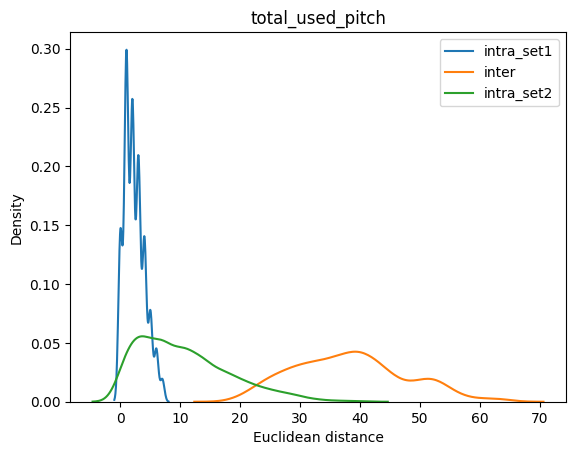

In [ ]:
plot_set1_intra = np.transpose(set1_intra,(1, 0, 2)).reshape(len(metrics_list), -1)
plot_set2_intra = np.transpose(set2_intra,(1, 0, 2)).reshape(len(metrics_list), -1)
plot_sets_inter = np.transpose(sets_inter,(1, 0, 2)).reshape(len(metrics_list), -1)
for i in range(0,len(metrics_list)):
    sns.kdeplot(plot_set1_intra[i], label='intra_set1')
    sns.kdeplot(plot_sets_inter[i], label='inter')
    sns.kdeplot(plot_set2_intra[i], label='intra_set2')
    plt.legend()

    plt.title(metrics_list[i])
    plt.xlabel('Euclidean distance')
    plt.show()

the difference of intra-set and inter-set distances.

In [ ]:
for i in range(0, len(metrics_list)):
    print (metrics_list[i] + ':')
    print ('------------------------')
    print (' demo_set1')
    print ('  Kullback–Leibler divergence:',utils.kl_dist(plot_set1_intra[i], plot_sets_inter[i]))
    print ('  Overlap area:', utils.overlap_area(plot_set1_intra[i], plot_sets_inter[i]))
    
    print (' demo_set2')
    print ('  Kullback–Leibler divergence:',utils.kl_dist(plot_set2_intra[i], plot_sets_inter[i]))
    print ('  Overlap area:', utils.overlap_area(plot_set2_intra[i], plot_sets_inter[i]))
    

total_used_pitch:
------------------------
 demo_set1
  Kullback–Leibler divergence: 0.1625319084326653
  Overlap area: 7.237427208967508e-11
 demo_set2
  Kullback–Leibler divergence: 0.38070273736356613
  Overlap area: 0.1226414042476699
